In [ ]:
# Install the library
!pip -q install FireHR==0.1.2 pyhdf==0.10.2

     |████████████████████████████████| 153kB 6.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 194kB 20.4MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 12.8MB 77kB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 19.3MB 1.3MB/s 
     |████████████████████████████████| 1.0MB 48.3MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 6.6MB 13.3MB/s 
     |████████████████████████████████| 15.4MB 154kB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
# Authenticate to use Google Earth Engine API
import ee
ee.Authenticate()

In [ ]:
from pathlib import Path
from FireHR.data import *

# Bounding box coordinates
left   = 13.782
right  = 13.819
bottom = 52.388
top    = 52.410

path_save   = Path('data')
products    = ["COPERNICUS/S2"]  # Product id in google earth engine
bands       = ['B4', 'B3', 'B2'] # Red, Green, Blue

R = RegionST(name         = 'TeslaGigaBerlin', 
             bbox         = [left,bottom,right,top], 
             scale_meters = 10, 
             time_start   = '2021-03-01', 
             time_end     = '2021-04-25')

# Download time series
# download_data_ts(R, products, bands, path_save)

time_window = R.times[0], R.times[-1]

# Download median composite of the 3 least cloudy images within the time_window
download_data(R, time_window, products, bands, path_save, use_least_cloudy=3, 
              show_progress=True)

#download_data_ts(R, products, bands, path_save, show_progress=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


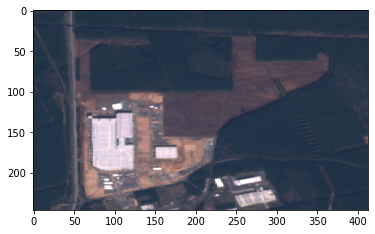

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from banet.data import open_tif

brightness = 3
im = np.concatenate([open_tif(f'data/download.{b}.tif').read() for b in bands])
im = im.transpose(1,2,0).astype(np.float32)/10000
plt.imshow(brightness*im)